In [660]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import missingno as msno
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from collections import Counter

from sklearn.ensemble import RandomForestClassifier
from lightgbm.sklearn import LGBMClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')


In [661]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sml-project/fraud_payment_data_JPMorgan.csv


In [662]:
finance_dataset = pd.read_csv('/kaggle/input/sml-project/fraud_payment_data_JPMorgan.csv')
finance_dataset = pd.DataFrame(finance_dataset)

In [663]:
finance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498177 entries, 0 to 1498176
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Time_step         1498177 non-null  object 
 1   Transaction_Id    1498177 non-null  object 
 2   Sender_Id         1279291 non-null  object 
 3   Sender_Account    1279291 non-null  object 
 4   Sender_Country    1279291 non-null  object 
 5   Sender_Sector     1279291 non-null  float64
 6   Sender_lob        1279291 non-null  object 
 7   Bene_Id           1282284 non-null  object 
 8   Bene_Account      1282284 non-null  object 
 9   Bene_Country      1282284 non-null  object 
 10  USD_amount        1498177 non-null  float64
 11  Label             1498177 non-null  int64  
 12  Transaction_Type  1498177 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 148.6+ MB


In [664]:
finance_dataset.shape

(1498177, 13)

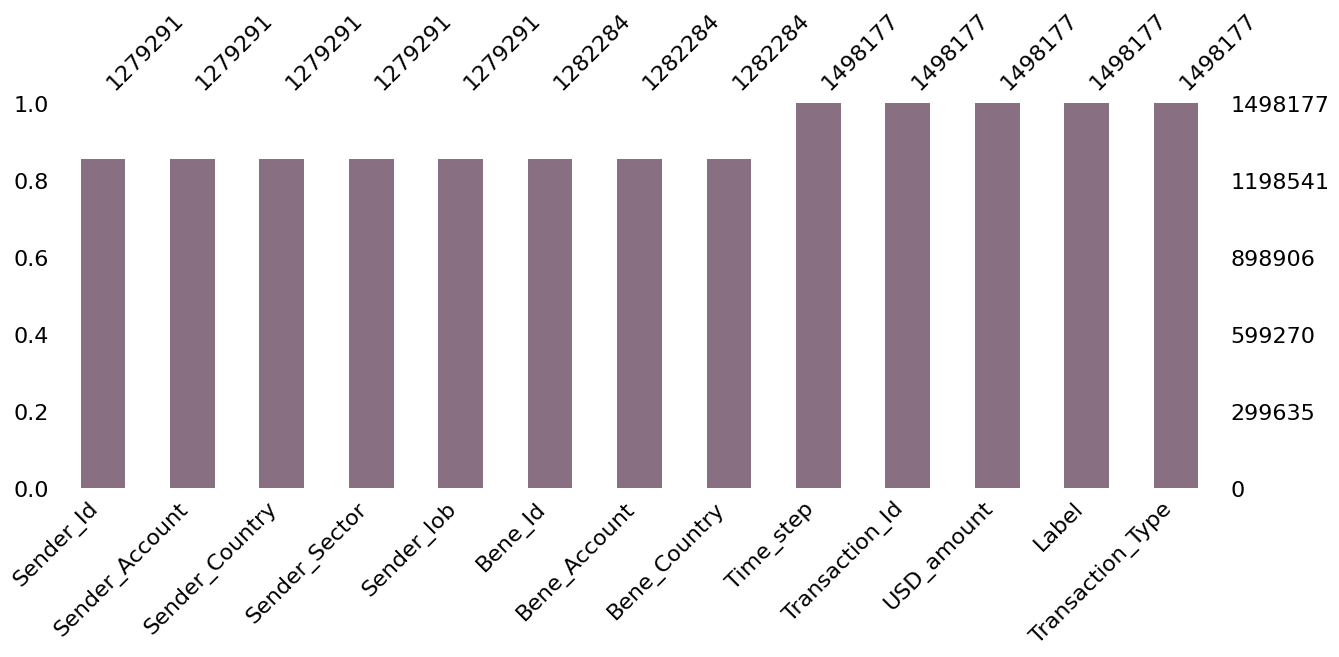

In [665]:
plt.figure(figsize = (15, 8))
msno.bar(finance_dataset, figsize = (15,5), sort = 'ascending', color = "#896F82")
plt.show()

In [666]:
finance_dataset.head()

,Time_step,Transaction_Id,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,2022-03-15 10:24:00,EXCHANGE-10115,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,2022-03-15 10:24:00,QUICK-PAYMENT-10116,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,2022-03-15 10:24:00,DEPOSIT-CASH-9833,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,2022-03-15 10:24:00,PAY-CHECK-9832,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,2022-03-15 10:24:00,DEPOSIT-CHECK-9806,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK


In [667]:
# Check Duplicates if any 
print("Number of Duplicates : ", finance_dataset.duplicated().sum())

Number of Duplicates :  0


In [668]:
finance_dataset.columns

Index(['Time_step', 'Transaction_Id', 'Sender_Id', 'Sender_Account',
       'Sender_Country', 'Sender_Sector', 'Sender_lob', 'Bene_Id',
       'Bene_Account', 'Bene_Country', 'USD_amount', 'Label',
       'Transaction_Type'],
      dtype='object')

In [669]:
finance_dataset = finance_dataset.drop(columns = ['Time_step','Transaction_Id'],axis = 'columns')

In [670]:
finance_dataset.head()

,Sender_Id,Sender_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Id,Bene_Account,Bene_Country,USD_amount,Label,Transaction_Type
0,JPMC-CLIENT-10098,ACCOUNT-10108,USA,35537.0,CCB,NaN,NaN,NaN,558.43,0,WITHDRAWAL
1,JPMC-CLIENT-10098,ACCOUNT-10109,USA,15287.0,CCB,CLIENT-10100,ACCOUNT-10106,CANADA,622.78,0,QUICK-PAYMENT
2,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9812,ACCOUNT-9826,USA,802.54,0,DEPOSIT-CASH
3,JPMC-CLIENT-9812,ACCOUNT-9825,USA,38145.0,CCB,JPMC-CLIENT-9814,ACCOUNT-9824,USA,989.09,0,PAY-CHECK
4,NaN,NaN,NaN,NaN,NaN,JPMC-CLIENT-9789,ACCOUNT-9800,USA,786.78,0,DEPOSIT-CHECK


In [671]:
cols = finance_dataset.columns.tolist()
new_position = 2

cols.insert(new_position, cols.pop(cols.index('Bene_Account')))
finance_dataset = finance_dataset[cols]

cols = finance_dataset.columns.tolist()
new_position = 1

cols.insert(new_position, cols.pop(cols.index('Bene_Id')))
finance_dataset = finance_dataset[cols]

In [672]:
finance_dataset.head()

,Sender_Id,Bene_Id,Sender_Account,Bene_Account,Sender_Country,Sender_Sector,Sender_lob,Bene_Country,USD_amount,Label,Transaction_Type
0,JPMC-CLIENT-10098,NaN,ACCOUNT-10108,NaN,USA,35537.0,CCB,NaN,558.43,0,WITHDRAWAL
1,JPMC-CLIENT-10098,CLIENT-10100,ACCOUNT-10109,ACCOUNT-10106,USA,15287.0,CCB,CANADA,622.78,0,QUICK-PAYMENT
2,NaN,JPMC-CLIENT-9812,NaN,ACCOUNT-9826,NaN,NaN,NaN,USA,802.54,0,DEPOSIT-CASH
3,JPMC-CLIENT-9812,JPMC-CLIENT-9814,ACCOUNT-9825,ACCOUNT-9824,USA,38145.0,CCB,USA,989.09,0,PAY-CHECK
4,NaN,JPMC-CLIENT-9789,NaN,ACCOUNT-9800,NaN,NaN,NaN,USA,786.78,0,DEPOSIT-CHECK


In [673]:
print(finance_dataset['Sender_lob'].nunique())

1


In [674]:
# drop sender_lob since these are just one number
finance_dataset = finance_dataset.drop(columns = ['Sender_lob','Sender_Account','Bene_Account'],axis = 'columns')

In [675]:
finance_dataset.loc[finance_dataset['Label'] == 1].isnull().sum()

Sender_Id           4121
Bene_Id             5136
Sender_Country      4121
Sender_Sector       4121
Bene_Country        5136
USD_amount             0
Label                  0
Transaction_Type       0
dtype: int64

In [676]:
print((finance_dataset['Label'] == 1).sum())

30819


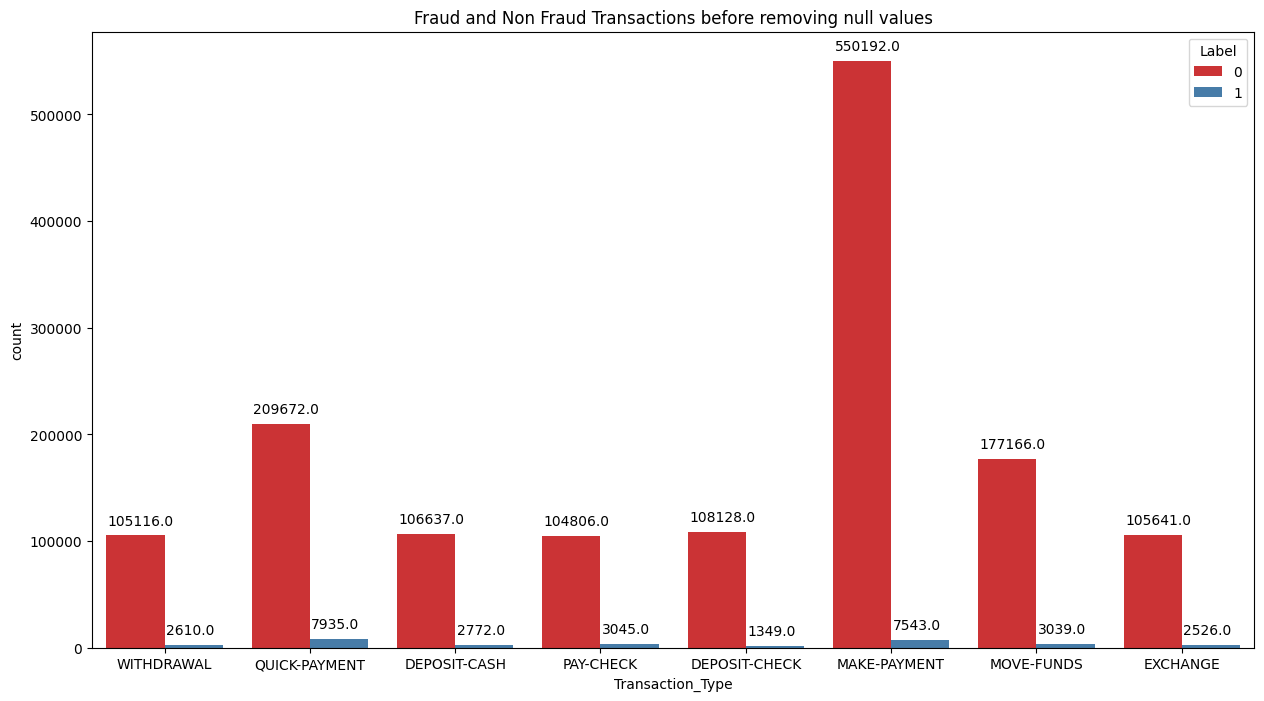

In [677]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data =  finance_dataset, x = "Transaction_Type", hue="Label", palette = 'Set1')
plt.title('Fraud and Non Fraud Transactions before removing null values')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

In [678]:
# finance_dataset = finance_dataset.dropna()

# **Handling Null Values**

In [679]:
finance_dataset.loc[finance_dataset['Label'] == 1].isnull().sum()

Sender_Id           4121
Bene_Id             5136
Sender_Country      4121
Sender_Sector       4121
Bene_Country        5136
USD_amount             0
Label                  0
Transaction_Type       0
dtype: int64

In [680]:
## Handling Null values for Sender-sector field using mean of "fraud" and "non-fraud"

data = pd.Series(finance_dataset['Sender_Sector'])
nan_indices = data.isna()
Label = pd.Series(finance_dataset['Label'])
mean_1,cntr1 = 0,0
mean_0,cntr0 = 0,0
for i in range(len(nan_indices)):
  if nan_indices[i]==0 and (Label[i] == 1):
    mean_1 += data[i]
    cntr1 += 1
  elif nan_indices[i]==0 and (Label[i] == 0):
    mean_0 += data[i]
    cntr0 += 1

mean_1 /= cntr1
mean_0 /= cntr0

for i in range(len(nan_indices)):
  if nan_indices[i]==1 and (Label[i] == 1):
    data[i] = mean_1
  elif nan_indices[i]==1 and (Label[i] == 0):
    data[i] = mean_0

In [681]:
print("Mean of sender sector with Label 1:",mean_1)
print("Mean of sender sector with Label 0:",mean_0)
finance_dataset['Sender_Sector'] = data

Mean of sender sector with Label 1: 25075.31878792419
Mean of sender sector with Label 0: 25020.183490567168


In [682]:
## Handling Null Values for Sender_Country and Bene_Country field using "unknown field"
sender_country_data = pd.Series(finance_dataset['Sender_Country'])
nan_indices = sender_country_data.isna()
Label = pd.Series(finance_dataset['Label'])
for i in range(len(nan_indices)):
  if nan_indices[i]:
    sender_country_data[i] = "UNKNOWN"
finance_dataset['Sender_Country'] = sender_country_data

bene_country_data = pd.Series(finance_dataset['Bene_Country'])
nan_indices = bene_country_data.isna()
Label = pd.Series(finance_dataset['Label'])
for i in range(len(nan_indices)):
  if nan_indices[i]:
    bene_country_data[i] = "UNKNOWN"
finance_dataset['Sender_Country'] = bene_country_data

In [683]:
finance_dataset.loc[finance_dataset['Label'] == 1].isnull().sum()

Sender_Id           4121
Bene_Id             5136
Sender_Country         0
Sender_Sector          0
Bene_Country           0
USD_amount             0
Label                  0
Transaction_Type       0
dtype: int64

In [684]:
"""Handling NUll values in Sender_Id and Bene_Id using following strategy:
There are total 5 parties involved in the transactions: [JP-CLIENT,JP-COMPANY,COMPANY,CLIENT,BILL-COMPANY]
which are encoded as: [JCL,JCOM,COM,CLT,BCO]
"""

def update_labels(dataset, label_prefix, new_label):
    sender_indices = dataset['Sender_Id'].str.startswith(label_prefix)
    bene_indices = dataset['Bene_Id'].str.startswith(label_prefix)
    
    # Check for null values before updating labels
    sender_null_indices = sender_indices & dataset['Sender_Id'].notnull()
    bene_null_indices = bene_indices & dataset['Bene_Id'].notnull()
    
    dataset.loc[sender_null_indices, 'Sender_Id'] = new_label
    dataset.loc[bene_null_indices, 'Bene_Id'] = new_label

# Define label mappings
label_mappings = {
    'COMPANY': 'COM',
    'BILL-COMPANY': 'BCO',
    'CLIENT': 'CLT',
    'JPMC-COMPANY': 'JCO',
    'JPMC-CLIENT': 'JCL'
}

# Apply label updates for each label type
for prefix, new_label in label_mappings.items():
    update_labels(finance_dataset, prefix, new_label)

In [685]:
"""Handling NUll values in Sender_Id and Bene_Id using following strategy:

THIS IS THE DATA OBTAINED WHEN ALL NULL VALUES ARE DROPPED
Number of fraud transactions according to type are below:
 send_rec
JCLCLT    8883
JCLBCO    3805
CLTJCL    3676
JCLJCL    1734
JCLCOM    1731
JCLJCO     723
BCOJCL     619
COMJCL     270
JCOJCL     121
Name: count, dtype: int64 

Number of valid transactions according to type are below:
 send_rec
JCLBCO    358360
JCLCLT    298159
CLTJCL    106932
JCLJCL     86698
JCLCOM     61753
COMJCL     58934
JCLJCO     26322
JCOJCL     24892
BCOJCL     19786

BASED ON THE MAX CRITERIA VALUES ARE ASSIGNED TO EACH COMBINATION

"""
sender_data = pd.Series(finance_dataset['Sender_Id'])
bene_data = pd.Series(finance_dataset['Bene_Id'])
nan_indices_sender = sender_data.isna()
print(nan_indices)
Label = pd.Series(finance_dataset['Label'])

for i in range(len(nan_indices_sender)):
  if nan_indices_sender[i] and bene_data[i] == 'JCL':
    sender_data[i] = 'CLT'
  elif nan_indices_sender[i]:
    sender_data[i] = 'JCL'

nan_indices_bene = bene_data.isna()
for i in range(len(nan_indices_bene)):
  if nan_indices_bene[i] and sender_data[i] == 'JCL':
    if Label[i] == 1:
      bene_data[i] = 'CLT'
    else:
      bene_data[i] = 'BCO'
  elif nan_indices_bene[i]:
    bene_data[i] = 'JCL'

finance_dataset['Bene_Id'] = bene_data
finance_dataset['Sender_Id'] = sender_data
  # elif i == m.isnan(i):
  #   print(True)

0           True
1          False
2          False
3          False
4          False
           ...  
1498172    False
1498173    False
1498174    False
1498175    False
1498176    False
Name: Bene_Country, Length: 1498177, dtype: bool


In [686]:
## ALL NULL VALUES ARE HANDLED
finance_dataset.loc[finance_dataset['Label'] == 1].isnull().sum()

Sender_Id           0
Bene_Id             0
Sender_Country      0
Sender_Sector       0
Bene_Country        0
USD_amount          0
Label               0
Transaction_Type    0
dtype: int64

In [688]:
finance_dataset.head()

,Sender_Id,Bene_Id,Sender_Country,Sender_Sector,Bene_Country,USD_amount,Label,Transaction_Type
0,JCL,BCO,UNKNOWN,35537.000000,UNKNOWN,558.43,0,WITHDRAWAL
1,JCL,CLT,CANADA,15287.000000,CANADA,622.78,0,QUICK-PAYMENT
2,CLT,JCL,USA,25020.183491,USA,802.54,0,DEPOSIT-CASH
3,JCL,JCL,USA,38145.000000,USA,989.09,0,PAY-CHECK
4,CLT,JCL,USA,25020.183491,USA,786.78,0,DEPOSIT-CHECK


In [689]:
finance_dataset.isnull().any()

Sender_Id           False
Bene_Id             False
Sender_Country      False
Sender_Sector       False
Bene_Country        False
USD_amount          False
Label               False
Transaction_Type    False
dtype: bool

CheckPoint1: A significant drop in fraud cases after removing null value. Also, observe the plots entries with "Exchange" field has been deleted.

In [690]:
print((finance_dataset['Label'] == 1).sum())

30819


EDA

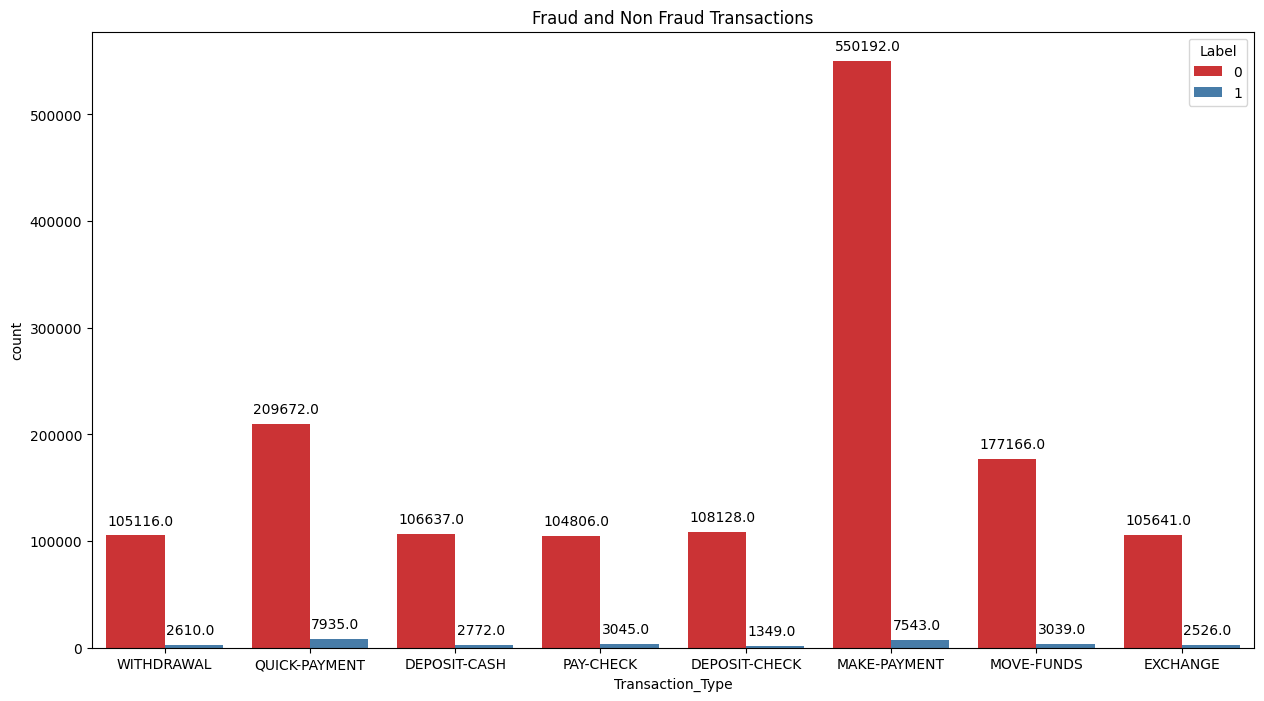

In [691]:
plt.figure(figsize = (15, 8))
ax=sns.countplot(data =  finance_dataset, x = "Transaction_Type", hue="Label", palette = 'Set1')
plt.title('Fraud and Non Fraud Transactions')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

In [692]:
print(finance_dataset['Sender_Id'].nunique())

5


In [694]:
finance_dataset.head(20)

lst_of_sender = []
for i in finance_dataset['Sender_Id']:
  str_so_far = ""
  for ch in i:
    if ch.isdigit():
      break
    else:
      str_so_far += ch
  lst_of_sender.append(str_so_far)

print(np.unique(np.array(lst_of_sender)))

lst_of_bene = []
for i in finance_dataset['Bene_Id']:
  str_so_far = ""
  for ch in i:
    if ch.isdigit():
      break
    else:
      str_so_far += ch
  lst_of_bene.append(str_so_far)

print(np.unique(np.array(lst_of_bene)))

['BCO' 'CLT' 'COM' 'JCL' 'JCO']
['BCO' 'CLT' 'COM' 'JCL' 'JCO']


In [695]:
quick_fraud = finance_dataset[((finance_dataset['Transaction_Type']=='QUICK-PAYMENT') & finance_dataset['Label']==1)]
quick_fraud['Sender_Id'].value_counts()

Sender_Id
JCL    5798
CLT    1671
BCO     284
COM     125
JCO      57
Name: count, dtype: int64

In [696]:
pay_check_fraud = finance_dataset[((finance_dataset['Transaction_Type']=='PAY-CHECK') & finance_dataset['Label']==1)]
pay_check_fraud['Sender_Id'].value_counts()

Sender_Id
JCL    2186
CLT     676
BCO     110
COM      53
JCO      20
Name: count, dtype: int64

In [697]:
make_payment_fraud = finance_dataset[((finance_dataset['Transaction_Type']=='MAKE-PAYMENT') & finance_dataset['Label']==1)]
make_payment_fraud['Sender_Id'].value_counts()

Sender_Id
JCL    6716
CLT     650
BCO     118
COM      39
JCO      20
Name: count, dtype: int64

In [698]:
move_funds_fraud = finance_dataset[((finance_dataset['Transaction_Type']=='MOVE-FUNDS') & finance_dataset['Label']==1)]
move_funds_fraud['Sender_Id'].value_counts()

Sender_Id
JCL    2176
CLT     679
BCO     107
COM      53
JCO      24
Name: count, dtype: int64

In [699]:
exchange_fraud = finance_dataset[((finance_dataset['Transaction_Type']=='EXCHANGE') & finance_dataset['Label']==1)]
exchange_fraud['Sender_Id'].value_counts()

Sender_Id
JCL    2526
Name: count, dtype: int64

In [700]:
deposit_check_fraud = finance_dataset[((finance_dataset['Transaction_Type']=='DEPOSIT-CHECK') & finance_dataset['Label']==1)]
deposit_check_fraud['Sender_Id'].value_counts()

Sender_Id
CLT    1349
Name: count, dtype: int64

In [701]:
deposit_cash_fraud = finance_dataset[((finance_dataset['Transaction_Type']=='DEPOSIT-CASH') & finance_dataset['Label']==1)]
deposit_cash_fraud['Sender_Id'].value_counts()

Sender_Id
CLT    2772
Name: count, dtype: int64

In [702]:
withdrawal_fraud = finance_dataset[((finance_dataset['Transaction_Type']=='WITHDRAWAL') & finance_dataset['Label']==1)]
withdrawal_fraud['Sender_Id'].value_counts()

Sender_Id
JCL    2610
Name: count, dtype: int64

**Insights : In most fraud cases class jpmc-client is involved**

**Feature Engineering**

In [703]:
data = finance_dataset.copy()
data['send_rec'] = np.nan

data.loc[finance_dataset.Sender_Id.str.contains('BCO') & finance_dataset.Bene_Id.str.contains('BCO'), 'send_rec'] = 'BCOBCO'
data.loc[finance_dataset.Sender_Id.str.contains('BCO') & finance_dataset.Bene_Id.str.contains('CLT'), 'send_rec'] = 'BCOCLT'
data.loc[finance_dataset.Sender_Id.str.contains('BCO') & finance_dataset.Bene_Id.str.contains('COM'), 'send_rec'] = 'BCOCOM'
data.loc[finance_dataset.Sender_Id.str.contains('BCO') & finance_dataset.Bene_Id.str.contains('JCL'), 'send_rec'] = 'BCOJCL'
data.loc[finance_dataset.Sender_Id.str.contains('BCO') & finance_dataset.Bene_Id.str.contains('JCO'), 'send_rec'] = 'BCOJCO'

data.loc[finance_dataset.Sender_Id.str.contains('CLT') & finance_dataset.Bene_Id.str.contains('BCO'), 'send_rec'] = 'CLTBCO'
data.loc[finance_dataset.Sender_Id.str.contains('CLT') & finance_dataset.Bene_Id.str.contains('CLT'), 'send_rec'] = 'CLTCLT'
data.loc[finance_dataset.Sender_Id.str.contains('CLT') & finance_dataset.Bene_Id.str.contains('COM'), 'send_rec'] = 'CLTCOM'
data.loc[finance_dataset.Sender_Id.str.contains('CLT') & finance_dataset.Bene_Id.str.contains('JCL'), 'send_rec'] = 'CLTJCL'
data.loc[finance_dataset.Sender_Id.str.contains('CLT') & finance_dataset.Bene_Id.str.contains('JCO'), 'send_rec'] = 'CLTJCO'

data.loc[finance_dataset.Sender_Id.str.contains('COM') & finance_dataset.Bene_Id.str.contains('BCO'), 'send_rec'] = 'COMBCO'
data.loc[finance_dataset.Sender_Id.str.contains('COM') & finance_dataset.Bene_Id.str.contains('CLT'), 'send_rec'] = 'COMCLT'
data.loc[finance_dataset.Sender_Id.str.contains('COM') & finance_dataset.Bene_Id.str.contains('COM'), 'send_rec'] = 'COMCOM'
data.loc[finance_dataset.Sender_Id.str.contains('COM') & finance_dataset.Bene_Id.str.contains('JCL'), 'send_rec'] = 'COMJCL'
data.loc[finance_dataset.Sender_Id.str.contains('COM') & finance_dataset.Bene_Id.str.contains('JCO'), 'send_rec'] = 'COMJCO'

data.loc[finance_dataset.Sender_Id.str.contains('JCL') & finance_dataset.Bene_Id.str.contains('BCO'), 'send_rec'] = 'JCLBCO'
data.loc[finance_dataset.Sender_Id.str.contains('JCL') & finance_dataset.Bene_Id.str.contains('CLT'), 'send_rec'] = 'JCLCLT'
data.loc[finance_dataset.Sender_Id.str.contains('JCL') & finance_dataset.Bene_Id.str.contains('COM'), 'send_rec'] = 'JCLCOM'
data.loc[finance_dataset.Sender_Id.str.contains('JCL') & finance_dataset.Bene_Id.str.contains('JCL'), 'send_rec'] = 'JCLJCL'
data.loc[finance_dataset.Sender_Id.str.contains('JCL') & finance_dataset.Bene_Id.str.contains('JCO'), 'send_rec'] = 'JCLJCO'

data.loc[finance_dataset.Sender_Id.str.contains('JCO') & finance_dataset.Bene_Id.str.contains('BCO'), 'send_rec'] = 'JCOBCO'
data.loc[finance_dataset.Sender_Id.str.contains('JCO') & finance_dataset.Bene_Id.str.contains('CLT'), 'send_rec'] = 'JCOCLT'
data.loc[finance_dataset.Sender_Id.str.contains('JCO') & finance_dataset.Bene_Id.str.contains('COM'), 'send_rec'] = 'JCOCOM'
data.loc[finance_dataset.Sender_Id.str.contains('JCO') & finance_dataset.Bene_Id.str.contains('JCL'), 'send_rec'] = 'JCOJCL'
data.loc[finance_dataset.Sender_Id.str.contains('JCO') & finance_dataset.Bene_Id.str.contains('JCO'), 'send_rec'] = 'JCOJCO'

In [704]:
data.drop(columns = ['Sender_Id','Bene_Id'], axis = 'columns', inplace = True)

In [705]:
cols = data.columns.tolist()
new_position = 0

cols.insert(new_position, cols.pop(cols.index('send_rec')))
data = data[cols]


cols = data.columns.tolist()
new_position = 2

cols.insert(new_position, cols.pop(cols.index('Bene_Country')))
data = data[cols]


## changing position of transaction type column
cols = data.columns.tolist()
new_position = 3

cols.insert(new_position, cols.pop(cols.index('Transaction_Type')))
data = data[cols]

In [706]:
data.head()

,send_rec,Sender_Country,Bene_Country,Transaction_Type,Sender_Sector,USD_amount,Label
0,JCLBCO,UNKNOWN,UNKNOWN,WITHDRAWAL,35537.000000,558.43,0
1,JCLCLT,CANADA,CANADA,QUICK-PAYMENT,15287.000000,622.78,0
2,CLTJCL,USA,USA,DEPOSIT-CASH,25020.183491,802.54,0
3,JCLJCL,USA,USA,PAY-CHECK,38145.000000,989.09,0
4,CLTJCL,USA,USA,DEPOSIT-CHECK,25020.183491,786.78,0


In [707]:
print((data['send_rec'] == 'BCOCLT').sum())

0


In [708]:
fraud_trans = data[data['Label'] == 1]
valid_trans = data[data['Label'] == 0]
print('Number of fraud transactions according to type are below:\n', fraud_trans.send_rec.value_counts(), '\n')
print('Number of valid transactions according to type are below:\n', valid_trans.send_rec.value_counts())

Number of fraud transactions according to type are below:
 send_rec
JCLCLT    14019
CLTJCL     7797
JCLBCO     3805
JCLJCL     1734
JCLCOM     1731
JCLJCO      723
BCOJCL      619
COMJCL      270
JCOJCL      121
Name: count, dtype: int64 

Number of valid transactions according to type are below:
 send_rec
JCLBCO    569117
CLTJCL    321697
JCLCLT    298159
JCLJCL     86698
JCLCOM     61753
COMJCL     58934
JCLJCO     26322
JCOJCL     24892
BCOJCL     19786
Name: count, dtype: int64


In [709]:
data.head()
data.describe()

,Sender_Sector,USD_amount,Label
count,1.498177e+06,1.498177e+06,1.498177e+06
mean,2.502132e+04,5.134698e+02,2.057100e-02
std,1.333586e+04,5.398089e+02,1.419431e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.468100e+04,1.386900e+02,0.000000e+00
50%,2.502018e+04,4.041600e+02,0.000000e+00
75%,3.539000e+04,7.340700e+02,0.000000e+00
max,4.999900e+04,1.999894e+04,1.000000e+00


**Add 1 more feature "Surge_indicator": Creates a new column which has 1 if the transaction amount is greater than the threshold
    else it will be 0**

In [710]:
finance_fraud = data[data['Label'] == 1].copy()
finance_valid = data[data['Label'] == 0].copy()

# print("Financial Fraud Data Analysis")
finance_fraud.describe()
mean = np.mean(finance_fraud['USD_amount'])
max_ = np.max(finance_fraud['USD_amount'])
std_dev = np.std(data['USD_amount'])
# print("Financial Non-Fraud Data Analysis")
# print(finance_valid.describe())

In [711]:
finance_fraud.describe()

,Sender_Sector,USD_amount,Label
count,30819.000000,30819.000000,30819.0
mean,25075.318788,847.442043,1.0
std,13414.504284,2003.566402,0.0
min,0.000000,100.000000,1.0
25%,14513.500000,254.115000,1.0
50%,25075.318788,512.230000,1.0
75%,35672.500000,773.975000,1.0
max,49999.000000,19998.940000,1.0


In [712]:
finance_valid.describe()

,Sender_Sector,USD_amount,Label
count,1.467358e+06,1.467358e+06,1467358.0
mean,2.502018e+04,5.064553e+02,0.0
std,1.333421e+04,4.591433e+02,0.0
min,0.000000e+00,0.000000e+00,0.0
25%,1.468500e+04,1.355300e+02,0.0
50%,2.502018e+04,4.011900e+02,0.0
75%,3.538300e+04,7.330300e+02,0.0
max,4.999900e+04,1.985449e+04,0.0


In [713]:
def surge_indicator(data):
    '''Creates a new column which has 1 if the transaction amount is greater than the threshold
    else it will be 0'''
    threshold = max_*(3/4)
    data['surge']=[1 if n>threshold else 0 for n in data['USD_amount']]
    
surge_indicator(data)
data['surge'].value_counts()

surge
0    1497969
1        208
Name: count, dtype: int64

In [714]:
data.head()

,send_rec,Sender_Country,Bene_Country,Transaction_Type,Sender_Sector,USD_amount,Label,surge
0,JCLBCO,UNKNOWN,UNKNOWN,WITHDRAWAL,35537.000000,558.43,0,0
1,JCLCLT,CANADA,CANADA,QUICK-PAYMENT,15287.000000,622.78,0,0
2,CLTJCL,USA,USA,DEPOSIT-CASH,25020.183491,802.54,0,0
3,JCLJCL,USA,USA,PAY-CHECK,38145.000000,989.09,0,0
4,CLTJCL,USA,USA,DEPOSIT-CHECK,25020.183491,786.78,0,0


**Data Visualization**

Text(0.5, 1.0, 'Distribution of sender_sector')

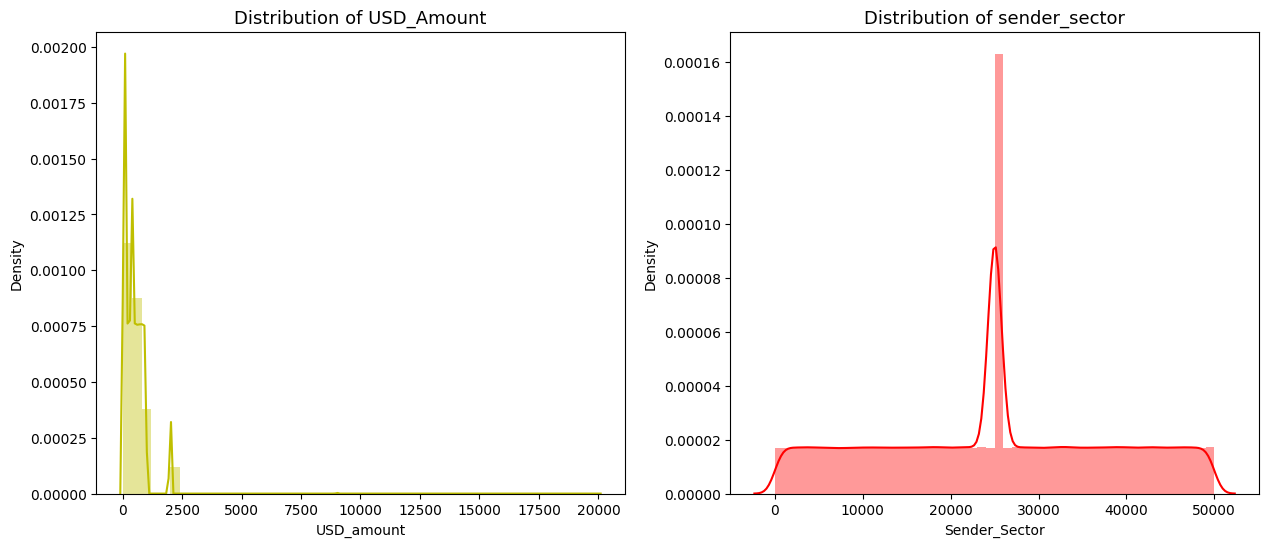

In [715]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1 = sns.distplot(finance_dataset['USD_amount'], ax=ax1, color='y')
ax2 = sns.distplot(finance_dataset['Sender_Sector'], ax=ax2, color='r')
ax1.set_title('Distribution of USD_Amount', fontsize=13)
ax2.set_title('Distribution of sender_sector', fontsize=13)
## The Data doesn't folow Normal Distribution and Thus filters our choice of the models

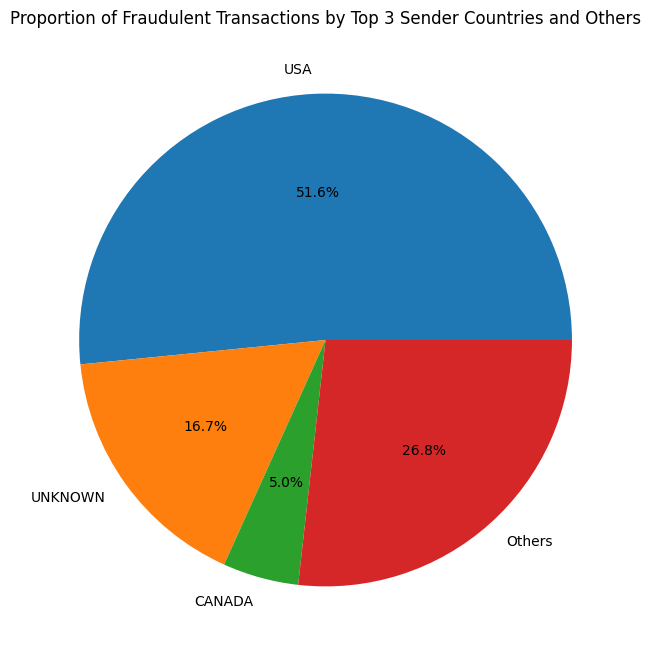

In [716]:
import matplotlib.pyplot as plt

fraudulent_transactions = finance_dataset[finance_dataset['Label'] == 1]
country_fraud_counts = fraudulent_transactions.groupby('Sender_Country').size()
top_3_countries = country_fraud_counts.nlargest(3)
others_count = country_fraud_counts.sum() - top_3_countries.sum()
plot_data = pd.concat([top_3_countries, pd.Series(others_count, index=['Others'])])

# Plot a pie chart with the top 3 countries and "Others" category
plt.figure(figsize=(10, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%')
plt.title('Proportion of Fraudulent Transactions by Top 3 Sender Countries and Others')

plt.show()

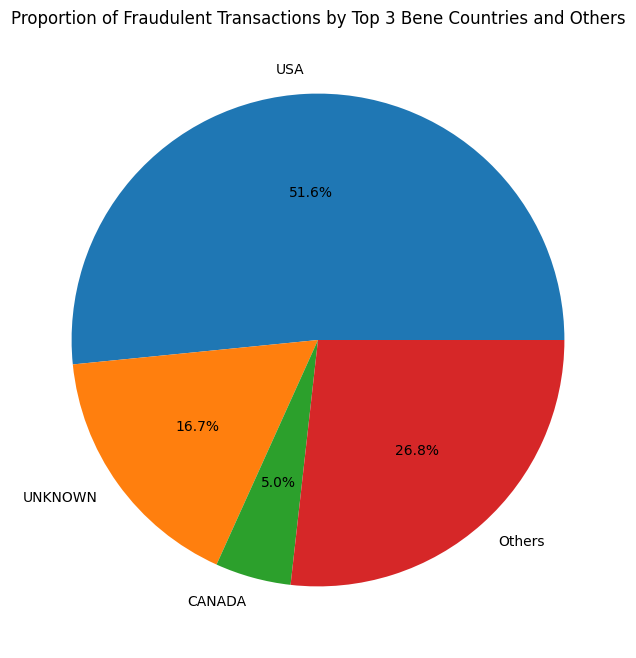

In [717]:
import pandas as pd
import matplotlib.pyplot as plt
fraudulent_transactions = finance_dataset[finance_dataset['Label'] == 1]
country_fraud_counts = fraudulent_transactions.groupby('Bene_Country').size()
# Get the top 3 countries with the highest counts of fraudulent transactions
top_3_countries = country_fraud_counts.nlargest(3)
others_count = country_fraud_counts.sum() - top_3_countries.sum()
plot_data = pd.concat([top_3_countries, pd.Series(others_count, index=['Others'])])
# Plot a pie chart with the top 3 countries and "Others" category
plt.figure(figsize=(10, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%')
plt.title('Proportion of Fraudulent Transactions by Top 3 Bene Countries and Others')
plt.show()

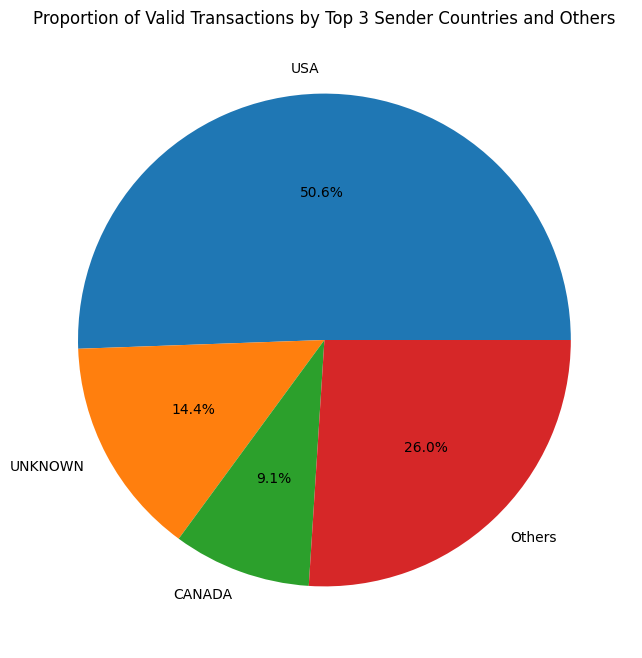

In [718]:
import pandas as pd
import matplotlib.pyplot as plt
valid_transactions = finance_dataset[finance_dataset['Label'] == 0]
country_fraud_counts = valid_transactions.groupby('Sender_Country').size()
# Get the top 3 countries with the highest counts of fraudulent transactions
top_3_countries = country_fraud_counts.nlargest(3)
others_count = country_fraud_counts.sum() - top_3_countries.sum()
plot_data = pd.concat([top_3_countries, pd.Series(others_count, index=['Others'])])
plt.figure(figsize=(10, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%')
plt.title('Proportion of Valid Transactions by Top 3 Sender Countries and Others')
plt.show()

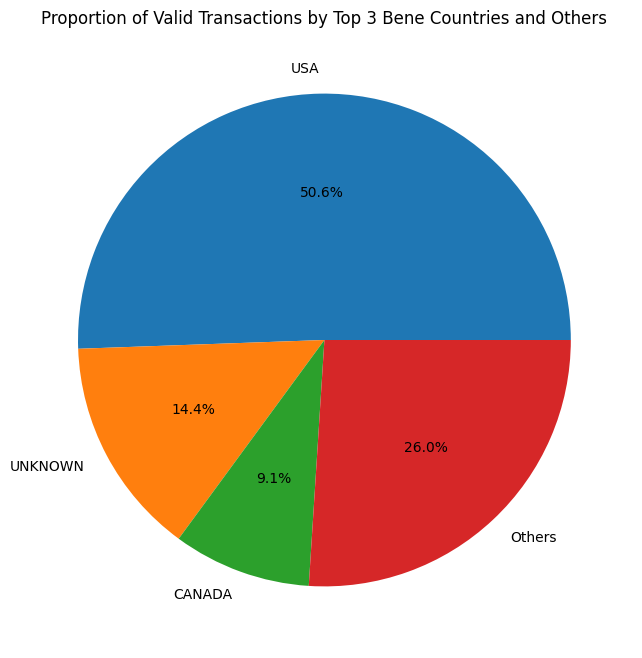

In [719]:
import pandas as pd
import matplotlib.pyplot as plt
valid_transactions = finance_dataset[finance_dataset['Label'] == 0]
country_fraud_counts = valid_transactions.groupby('Bene_Country').size()
# Get the top 3 countries with the highest counts of fraudulent transactions
top_3_countries = country_fraud_counts.nlargest(3)
others_count = country_fraud_counts.sum() - top_3_countries.sum()
plot_data = pd.concat([top_3_countries, pd.Series(others_count, index=['Others'])])
plt.figure(figsize=(10, 8))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%')
plt.title('Proportion of Valid Transactions by Top 3 Bene Countries and Others')
plt.show()

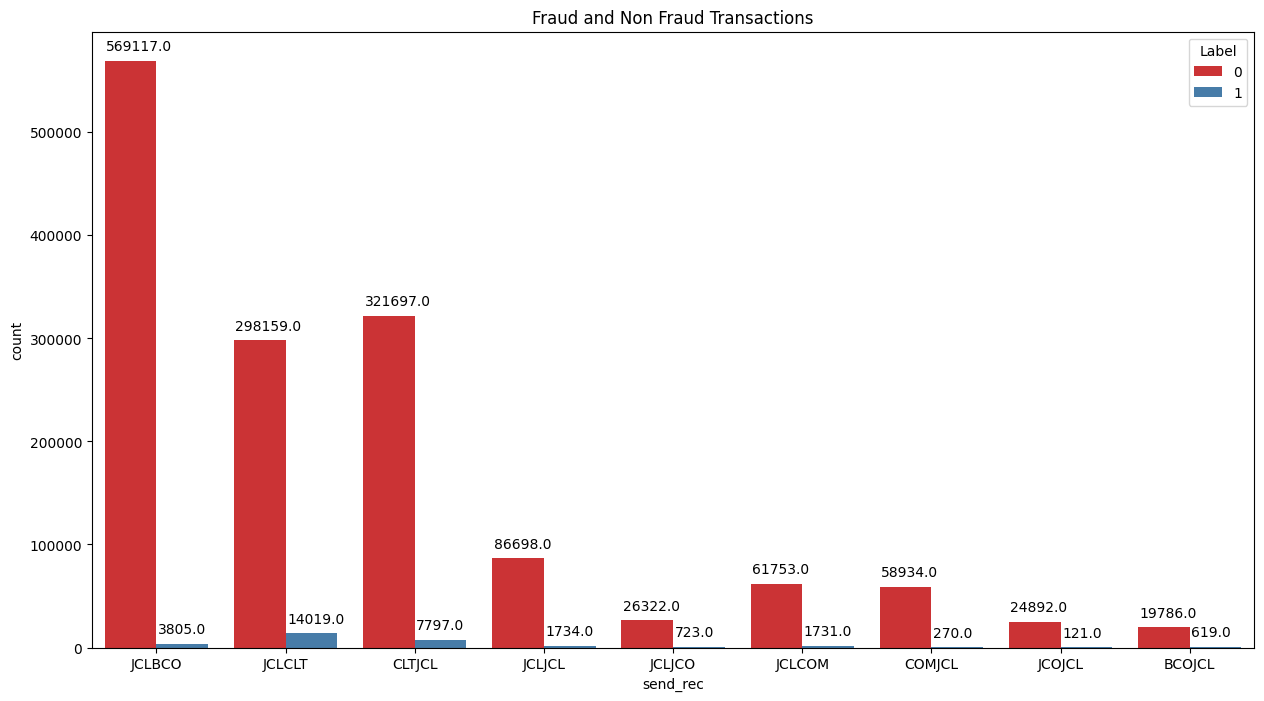

In [720]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 8))
ax=sns.countplot(data =  data, x = "send_rec", hue="Label", palette = 'Set1')
plt.title('Fraud and Non Fraud Transactions')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10000))

Insights:
1. By creating a new feature send_rec, using Sender_Id and Bene_Id. we can analyse from the plot which category is more prominent to fraud by comparing the ratio of Fraud v/s Not Fraud Transaction.
2. We can see that Transactions with USA as Sender_Country and Bene_Country are more involved in the transactions.
3. Other Countries include Canada, Germnay and some Countries whose data is missing.

**Data Pre-procesing**


In [721]:
## Using Label Encoding 
from sklearn.preprocessing import LabelEncoder
column_list = ['send_rec','Sender_Country','Bene_Country','Transaction_Type','surge']

encoders = {}

# Loop through each column that needs encoding
for column in column_list:
    # Create a LabelEncoder for the column
    encoder = LabelEncoder()
    # Fit and transform the data using LabelEncoder
    data[column] = encoder.fit_transform(data[column])
    # Store the encoder in the dictionary for future use (if needed)
    encoders[column] = encoder

# Print the DataFrame with the encoded columns

In [722]:
print(data.head())
data.shape

   send_rec  Sender_Country  Bene_Country  Transaction_Type  Sender_Sector  \
0         3             238           238                 7   35537.000000   
1         4              40            40                 6   15287.000000   
2         1             240           240                 0   25020.183491   
3         6             240           240                 5   38145.000000   
4         1             240           240                 1   25020.183491   

   USD_amount  Label  surge  
0      558.43      0      0  
1      622.78      0      0  
2      802.54      0      0  
3      989.09      0      0  
4      786.78      0      0  


(1498177, 8)

CheckPoint: Pandas converting it to 516 dimensions 

In [723]:
X = data.drop('Label',axis = 1)
y = data.Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, stratify = data.Label)
# X_train_c = X_train.copy()
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<Axes: >

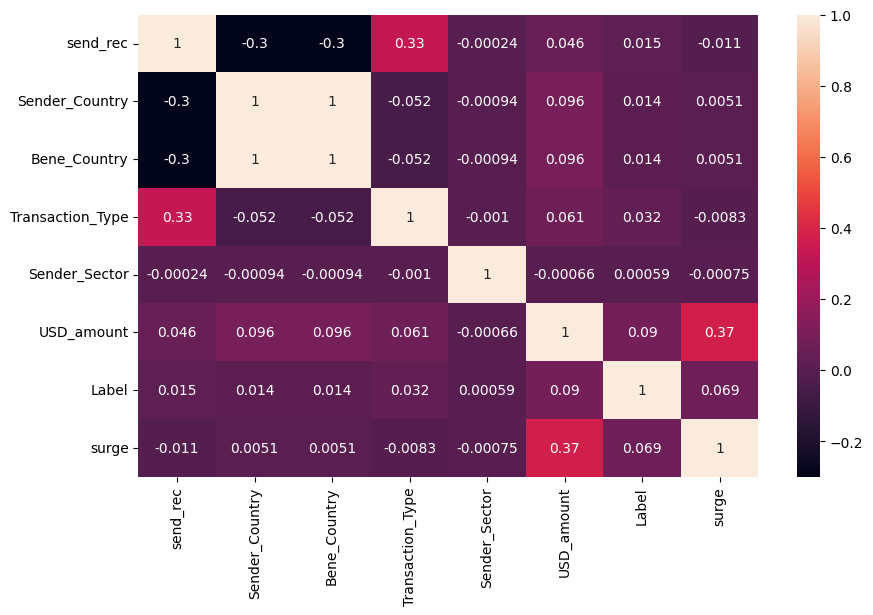

In [724]:
## correlation Matrix

corr = data.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True)

In [725]:
print(X_train.shape)
print((np.array(y_train) == 1).sum())

(1048723, 7)
21573


**Model Training**

In [726]:
rfc=RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
lgbm = LGBMClassifier(boosting_type = 'gbdt',objective = 'binary', random_state = 8888)
xgbr = xgb.XGBClassifier(max_depth = 3, n_jobs = -1, random_state = 42, learning_rate = 0.1)
logreg = LogisticRegression(solver = 'liblinear', random_state = 42)

In [727]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [728]:
## FineTune lgbm

lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 21573, number of negative: 1027150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.227945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 800
[LightGBM] [Info] Number of data points in the train set: 1048723, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.020571 -> initscore=-3.863101
[LightGBM] [Info] Start training from score -3.863101


LGBMClassifier(objective='binary', random_state=8888)

In [729]:
xgbr.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

In [730]:
logreg.fit(X_train, y_train)

classifiers = []
classifiers.append(rfc)
classifiers.append(lgbm)
classifiers.append(xgbr)
classifiers.append(logreg)

In [731]:
accuracy_list = []
auc_list = []

for classifier in classifiers:
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:,1]
    accuracy_list.append(accuracy_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_pred_proba))

accuracy_dict = {}
auc_dict = {}
for i in range(4):
    key=['Random Forest', 'Light GBM', 'XGBoost','LR'][i]
    accuracy_dict[key] = accuracy_list[i]
    auc_dict[key] = auc_list[i]

accuracy_dict_sorted = dict(sorted(accuracy_dict.items(), key = lambda item: item[1]))
auc_dict_sorted = dict(sorted(auc_dict.items(), key = lambda item: item[1]))

In [732]:
def px_bar(x,y,text,title,color,color_discrete_sequence):
    return px.bar(x = x, y = y, text = text, title = title, color = color, color_discrete_sequence=color_discrete_sequence)

In [733]:
fig = px_bar(list(accuracy_dict_sorted.keys()), list(accuracy_dict_sorted.values()), np.round(list(accuracy_dict_sorted.values()),3), 'Accuracy score of each classifiers', list(accuracy_dict_sorted.keys()), px.colors.sequential.matter)
for idx in [2,3]:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color = "black"
fig.show()

In [734]:
fig = px_bar(list(auc_dict_sorted.keys()), list(auc_dict_sorted.values()), np.round(list(auc_dict_sorted.values()),3), 'AUC score of each classifiers', list(auc_dict_sorted.keys()), px.colors.sequential.matter)

for idx in [2,3]:
    fig.data[idx].marker.line.width = 3
    fig.data[idx].marker.line.color = "black"
fig.show()

In [735]:
rfc_pred = rfc.predict(X_test)
rfc_pred_proba = rfc.predict_proba(X_test)[:,1]

lgbm_pred = lgbm.predict(X_test)
lgbm_pred_proba = rfc.predict_proba(X_test)[:,1]

xgbr_pred = xgbr.predict(X_test)
xgbr_pred_proba = rfc.predict_proba(X_test)[:,1]

logreg_pred = logreg.predict(X_test)
logreg_pred_proba = rfc.predict_proba(X_test)[:,1]

In [736]:
print(classification_report(y_test, rfc_pred, target_names=['Not Fraud','Fraud']))
print(pd.crosstab(y_test, rfc_pred))

              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      0.99    440208
       Fraud       0.97      0.32      0.48      9246

    accuracy                           0.99    449454
   macro avg       0.98      0.66      0.74    449454
weighted avg       0.99      0.99      0.98    449454

col_0       0     1
Label              
0      440104   104
1        6283  2963


In [737]:
print(classification_report(y_test, lgbm_pred, target_names=['Not Fraud','Fraud']))
print(pd.crosstab(y_test, lgbm_pred))

              precision    recall  f1-score   support

   Not Fraud       0.99      1.00      0.99    440208
       Fraud       1.00      0.32      0.48      9246

    accuracy                           0.99    449454
   macro avg       0.99      0.66      0.74    449454
weighted avg       0.99      0.99      0.98    449454

col_0       0     1
Label              
0      440208     0
1        6287  2959


In [738]:
print(classification_report(y_test, xgbr_pred, target_names=['Not Fraud','Fraud']))
print(pd.crosstab(y_test, xgbr_pred))

              precision    recall  f1-score   support

   Not Fraud       0.98      1.00      0.99    440208
       Fraud       0.98      0.19      0.31      9246

    accuracy                           0.98    449454
   macro avg       0.98      0.59      0.65    449454
weighted avg       0.98      0.98      0.98    449454

col_0       0     1
Label              
0      440176    32
1        7532  1714


In [739]:
print(classification_report(y_test, logreg_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.98      1.00      0.99    440208
       Fraud       0.87      0.02      0.03      9246

    accuracy                           0.98    449454
   macro avg       0.93      0.51      0.51    449454
weighted avg       0.98      0.98      0.97    449454



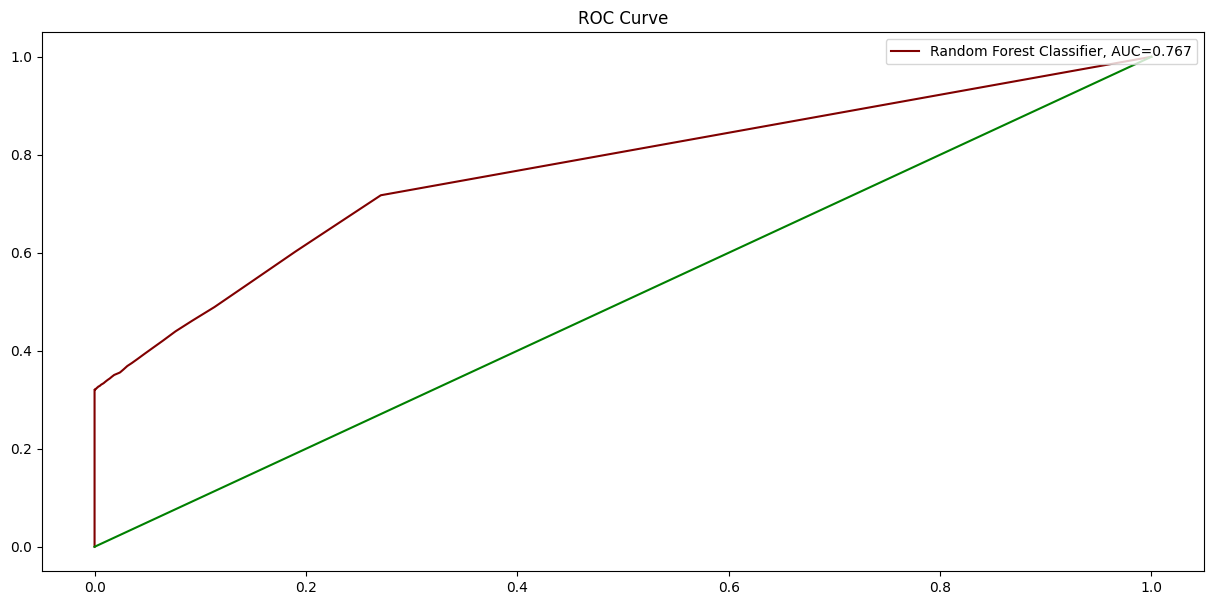

In [740]:
fpr, tpr, temp = roc_curve(y_test, rfc_pred_proba)
auc = round(roc_auc_score(y_test, rfc_pred_proba),3)
plt.figure(figsize=(15,7))
plt.plot(fpr,tpr,label='Random Forest Classifier, AUC='+str(auc),linestyle='solid',color='#800000')
plt.plot([0, 1], [0, 1], color = 'g')
plt.title('ROC Curve')
plt.legend(loc='upper right')